# Исследование объявлений о продаже квартир

**Описание проекта:** 
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


**План работ:**
- Шаг 1. Откройте файл с данными и изучите общую информацию
- Шаг 2. Выполните предобработку данных
- Шаг 3. Добавьте в таблицу новые столбцы
- Шаг 4. Проведите исследовательский анализ данных
- Шаг 5. Напишите общий вывод


  
**Описание данных:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении     

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

## Открытие файла с данными и изучение общуей информации

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

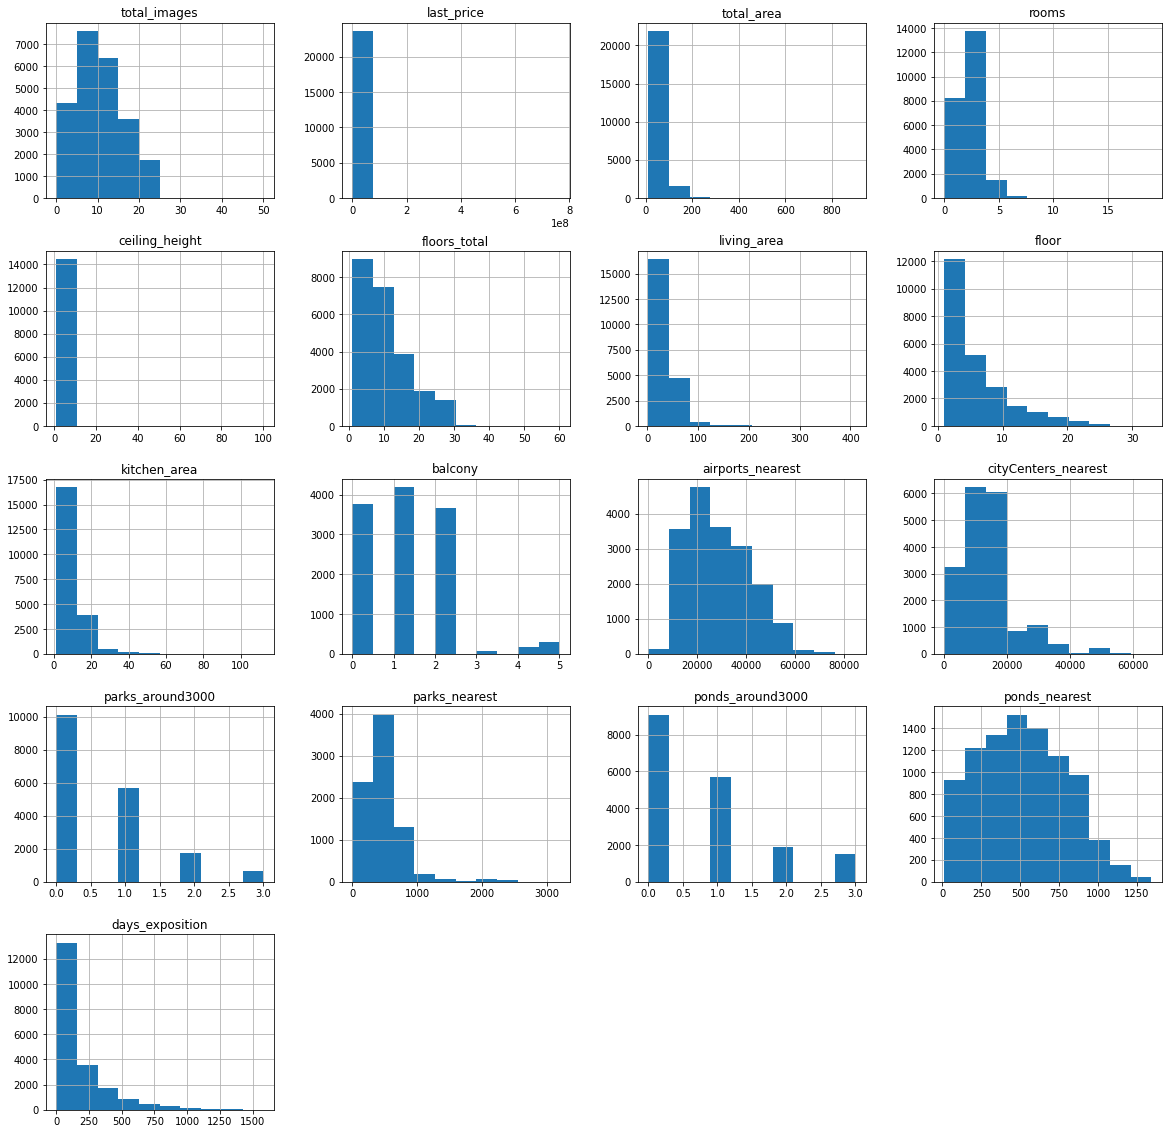

In [3]:
data.hist(figsize=(20, 20))

**Вывод:** На этапе предварительного изучения датаффрейма были замечены пропуски, а также некорректный тип данных в некоторых столбцах.

## Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Были обнаружены пропуски в следующих столбцах:**
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* living_area — жилая площадь в квадратных метрах (м²)
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* balcony — число балконов
* locality_name — название населённого пункта
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

**Пропуски в этих столбцах могли возникнуть из-за пользователя, который не заполнил полностью данные. 
Но при этом рано исключать техническую ошибку.**
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* living_area — жилая площадь в квадратных метрах (м²)
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* balcony — число балконов
* locality_name — название населённого пункта

Логично предположить, что если пользователь не заполнил информацию о балконе, то его просто нет. Поэтому заполним пустые значени нулем.

In [5]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Выста потолков в большинсвте квартир редко превышает 3 метра, так что можно заполнить эту информацию на основе медианы столбца ceiling_height. Выбор медианы, а не среднего значения обусловлен показателем std > 1.

In [6]:
data['ceiling_height'].describe()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Слишком много пропусков в столбце is_apartment, заполним их значением False.

In [7]:
print(data[data['is_apartment'] == False]['is_apartment'].count(), data[data['is_apartment'] == True]['is_apartment'].count())

2725 50


In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Пропуски в столбце:
* floors_total нельзя заполнить, так как нет конкретеного адреса дома, на основе которого можно было бы получить эту информацию. Да и всего количество пропусков незначительно.
* living_area нельзся заполнить ввиду недостаточности данных.
* kitchen_area нельзся заполнить ввиду недостаточности данных.
* locality_name нельзя заполнить, так как нет точных координатов, на основе которых можно было бы рассчитать местоположение города. Да и всего количество пропусков незначительно.

**Пропуски в следующих столбцах могут иметь исключительно техническую природу возникновения**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Все пропуски так или иначе связанные с расстоянием не получится заполнить с текущими данными. Для этого в таблице должна быть информация о широте и долготе дома, в котором находится квартира или хотя бы ее адрес. 
Пропущенные данные в столбце days_exposition также нельзя заполнить корректными данными, даже несмотря на то что есть данные о дате публикации (столбец first_day_exposition), нет данных о дате закрытия обьявления. Но для удобства конвертации столбца в нужный тип, заменим их на нулевые значения.

In [9]:
data['days_exposition'].isna().sum()

3181

In [10]:
days = data[data['days_exposition'].isna()]
days['first_day_exposition'] = pd.to_datetime(days['first_day_exposition'], format='%Y-%m-%d')
days['first_day_exposition'] = days['first_day_exposition'].dt.year
days.fillna(1)
days.value_counts('first_day_exposition')

/tmp/ipykernel_100/770728465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days['first_day_exposition'] = pd.to_datetime(days['first_day_exposition'], format='%Y-%m-%d')
/tmp/ipykernel_100/770728465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days['first_day_exposition'] = days['first_day_exposition'].dt.year


first_day_exposition
2019    1796
2018     959
2017     271
2015      70
2016      67
2014      18
dtype: int64

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(5000)
data['days_exposition'].isna().sum()

0

Большая часть пропусков в столбце days_exposition приходится на последние года, можно сделать вывод о том, что эти квартиры просто еще не успели продать. 

**После изучения общей информации о датафрейме было принято решение внести изменения:**
* тип данных столбца last_price изменить на int для более корректного отображения цены
* тип данных столбца first_day_exposition изменить на datetime для верного отображения формата даты 
* тип данных столбца floors_total изменить на int так как количество этажей - целое число
* тип данных столбца is_apartment на bool так как это категориальная переменная, принимающая одно из двух возможных значнеий  
* тип данных столбца balcony изменить на int так как количество балконов - целое число
* тип данных столбца airports_nearest изменить на int так как расстояние в метрах 
* тип данных столбца cityCenters_nearest изменить на int так как расстояние в метрах 
* тип данных столбца parks_around3000 изменить на int так как количество парков - целое число
* тип данных столбца parks_nearest изменить на int так как расстояние в метрах 
* тип данных столбца ponds_around3000 изменить на int так как количество прудов - целое число
* тип данных столбца ponds_nearest изменить на int так как расстояние в метрах 
* тип данных столбца days_exposition изменить на int так как количество дней - целое число

In [12]:
data['last_price'] = data['last_price'].astype('Int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['floors_total'] = data['floors_total'].astype('Int64')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype('Int64')
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [13]:
#Выведем количество пропусков по столбцам еще раз.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [14]:
data.duplicated().sum() #явных дубликатов нет

0

**Столбцы с потенцаильно неявными дубликатами:**
* locality_name — название населённого пункта

In [15]:
list(data['locality_name'].sort_values(ascending=False).unique())

['село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'садовое товарищество Садко',
 'садовое товарищество Рахья',
 'садовое товарищество Приладожский',
 'садовое товарищество Новая Ропша',
 'садоводческое некоммерческое товарищество Лесная Поляна',
 'посёлок станции Свирь',
 'посёлок станции Громово',
 'посёлок при железнодорожной станции Приветнинское',
 'посёлок при железнодорожной станции Вещево',
 'посёлок городского типа имени Свердлова',
 'посёлок городского типа имени Морозова',
 'посёлок городского типа Форносово',
 'посёлок городского типа Ульяновка',
 'посёлок городского типа Токсово',
 'посёлок городского типа Тайцы',
 'посёлок городского типа Сиверский',
 'посёлок городского типа Рябово',
 'посёлок городского типа Рощино',
 'посёлок городского типа Павлово',
 'посёлок городского типа Мга',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Кузьмолов

In [16]:
data['locality_name'] = (
    data['locality_name'].str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'коттеджный поселок', 'поселок станции', 'поселок при железнодорожной станции'], 'поселок ', regex=True)
    .replace(['садоводческое некоммерческое товарищество', 'садовое товарищество'], 'товарищество ', regex=True)
)

In [17]:
list(data['locality_name'].sort_values(ascending=False).unique())

['товарищество  Садко',
 'товарищество  Рахья',
 'товарищество  Приладожский',
 'товарищество  Новая Ропша',
 'товарищество  Лесная Поляна',
 'село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'поселок Щеглово',
 'поселок Шушары',
 'поселок Шугозеро',
 'поселок Цвылево',
 'поселок Цвелодубово',
 'поселок Форт Красная Горка',
 'поселок Ушаки',
 'поселок Усть-Луга',
 'поселок Усть-Ижора',
 'поселок Углово',
 'поселок Торфяное',
 'поселок Торковичи',
 'поселок Тесово-4',
 'поселок Терволово',
 'поселок Тельмана',
 'поселок Суходолье',
 'поселок Сумино',
 'поселок Суйда',
 'поселок Стрельна',
 'поселок Стеклянный',
 'поселок Старая Малукса',
 'поселок Сосново',
 'поселок Совхозный',
 'поселок Серебрянский',
 'поселок Семрино',
 'поселок Семиозерье',
 'поселок Сельцо',
 'поселок Селезнево',
 'поселок Севастьяново',
 'поселок Саперный',
 'поселок Саперное',
 'поселок Рябово',


Возьмем список всех столбцов и предположим в каких могут быть аномальные значения.

**Все столбцы:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**Вывод:** в ходе предобработки данных были исправлены типы данных в некоторых столбцах на подходящие, исправлены неявные дубликаты, а также заполнены пропуски в тех местах, в которых это можно было сделать, логически обосновав.

## Добавление в таблицу новых столбцов

In [18]:
#Добавим в таблицу цену одного квадратного метра
data['sqm_price'] = (data['last_price'] / data['total_area']).astype(int)
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,5000,120370


In [19]:
#Добавим в таблицу группировку по дням недели
data['day_week'] = data['first_day_exposition'].dt.weekday
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_week
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,5000,120370,3


In [20]:
#Добавим в таблицу группировку по месяцам публикации
data['moth_publish'] = data['first_day_exposition'].dt.month
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_week,moth_publish
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,18863,16028,1,482,2,755,5000,120370,3,3


In [21]:
#Добавим в таблицу группировку по годам публикации
data['year_publish'] = data['first_day_exposition'].dt.year
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_week,moth_publish,year_publish
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,16028,1,482,2,755,5000,120370,3,3,2019


In [22]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

In [23]:
#Добавим в таблицу столбец с типом этажа квартиры
def floor_type(row):
        if row['floor'] == row['floors_total']: return 'последний'
        elif row['floor'] == 1: return 'первый'
        else: return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_week,moth_publish,year_publish,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,5000,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,<NA>,0,<NA>,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90,2,574,558,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2,84,3,234,424,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121,100000,1,6,2018,другой


In [24]:
#Добавим в таблицу столбец с растоянием до центра в км
data['km_to_city_center'] = data['cityCenters_nearest'] / 1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day_week,moth_publish,year_publish,floor_type,km_to_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,5000,120370,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,<NA>,0,<NA>,81,82920,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90,2,574,558,92785,3,8,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84,3,234,424,408176,4,7,2015,другой,6.8
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,100000,1,6,2018,другой,8.098


**Вывод:** в датафрейм были добавлены новые столбцы, необходимые для последующего исследовательского анализа данных.

## Исследовательский анализ данных

### Постороение гистограмм и их описание

Список параметров, которые необходимо изучить:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

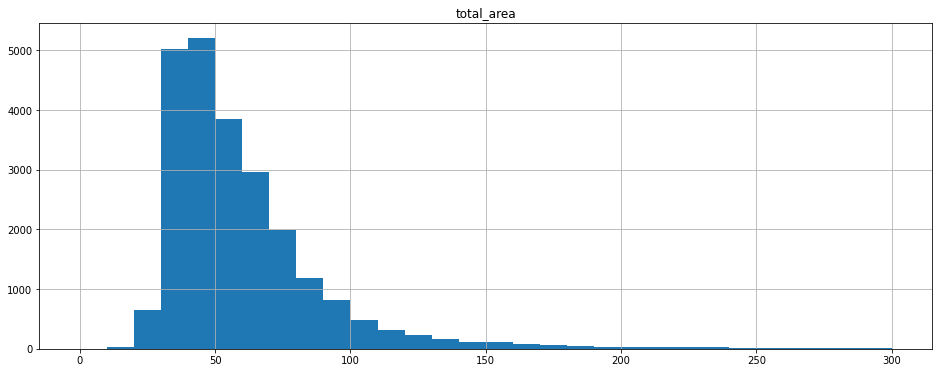

In [25]:
#Общая площадь
data.hist(column='total_area', bins=30, range=(0, 300), figsize=(16, 6))
data['total_area'].describe()


In [73]:
data[data['total_area'] > 250]['total_area'].count() / data['total_area'].count() # около 0.5%.
data = data[data['total_area'] <= 250]
data['total_area'].describe()

count    23498.000000
mean        58.952124
std         28.791636
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.900000
Name: total_area, dtype: float64

Было принято решение избавиться от выбросов площадью более 250 метров. Доля удаленных данных около 0.5%.

График имеет распределение Пуассона. Медианное значение находится на отметке 52 метра. Большинство квартир имеет общую площадь менее 100 квадратных метров.

count    21248.000000
mean        32.341253
std         15.424500
min          2.000000
25%         18.500000
50%         30.000000
75%         41.600000
max        128.000000
Name: living_area, dtype: float64

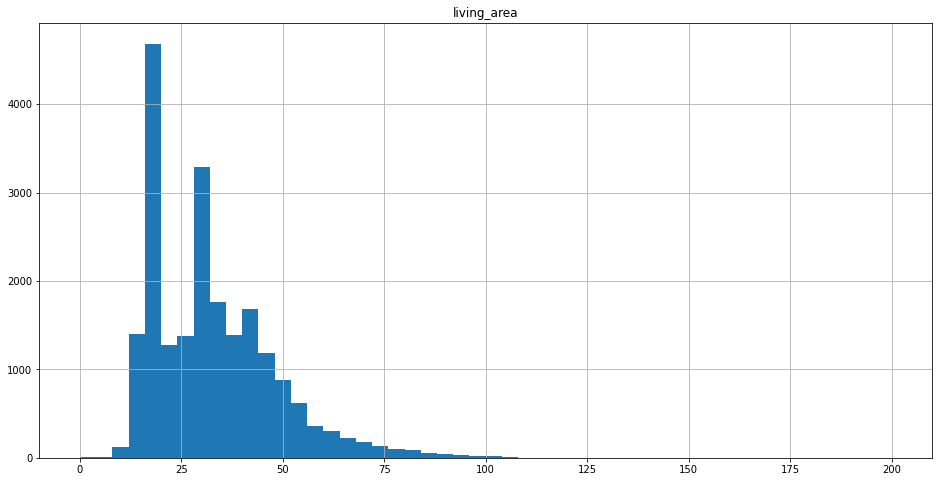

In [86]:
#Жилая площадь
data.hist(column='living_area', bins=50, range=(0, 200), figsize=(16, 8))
data['living_area'].describe()

In [84]:
data[data['living_area'] > 150]['living_area'].count() / data['living_area'].count() # около 0.2%.
data = data[data['living_area'] <= 150]
data['living_area'].describe()

count    21248.000000
mean        32.341253
std         15.424500
min          2.000000
25%         18.500000
50%         30.000000
75%         41.600000
max        128.000000
Name: living_area, dtype: float64

Было принято решение избавиться от выбросов площадью более 150 метров. Доля удаленных данных около 0.2%.

График имеет распределение Пуассона. Медианное значение находится на отметке 30 метров. Большинство квартир имеет жилую площадь менее 50 квадратных метров. Есть два плотных скопления данных в районе 18 и 31 метров. Можно предположить, что эти значений связаны с типовой застройкой домов.

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

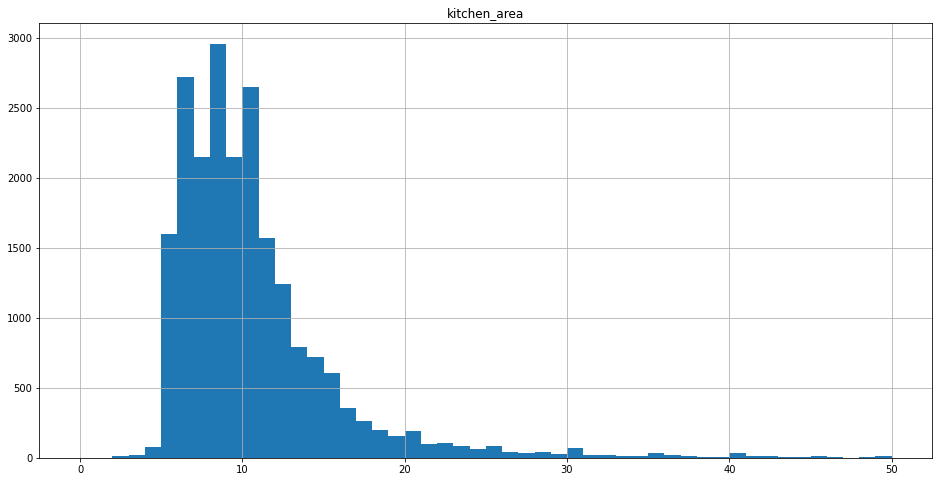

In [27]:
#площадь кухни
data.hist(column='kitchen_area', bins=50, range=(0, 50), figsize=(16, 8))
data['kitchen_area'].describe()

In [93]:
data[data['kitchen_area'] > 40]['kitchen_area'].count() / data['kitchen_area'].count() # около 0.3%.
data = data[data['kitchen_area'] <= 40]
data['kitchen_area'].describe()

count    20407.000000
mean        10.042598
std          4.420930
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         40.000000
Name: kitchen_area, dtype: float64

Было принято решение избавиться от выбросов площадью более 40 метров. Доля удаленных данных около 0.3%.

График имеет распределение Пуассона. Медианное значение находится на отметке 9 метров. Большинство квартир имеет  площадь кухни менее 50 квадратных метров. Есть три плотных скопления данных в районе 7, 9 и 11 метров. Можно также предположить, что эти значений связаны с типовой застройкой.

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

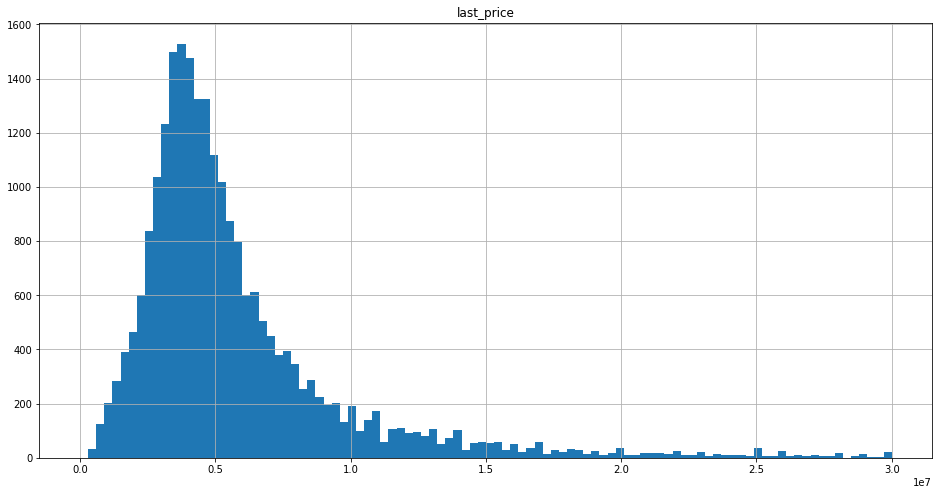

In [28]:
#цена объекта
data.hist(column='last_price', bins=100, range=(0, 30000000), figsize=(16, 8))
data['last_price'].describe()

In [101]:
data[data['last_price'] > 20000000]['last_price'].count() / data['last_price'].count() # около 1%.
data = data[data['last_price'] <= 20000000]
data['last_price'].describe()

count    2.014400e+04
mean     5.369521e+06
std      3.032428e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.600000e+06
75%      6.450000e+06
max      2.000000e+07
Name: last_price, dtype: float64

Было принято решение избавиться от выбросов стоимостью более 20000000 рублей. Доля удаленных данных около 1.3%.

График имеет распределение Пуассона. Медианное значение находится на отметке 4.6 миллионов рублей. Большинство квартир имеет стоимость менее 10 миллионов рублей. Есть три плотных скопления данных в районе 7, 9 и 11 метров. Можно также предположить, что эти значений связаны с типовой застройкой.

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

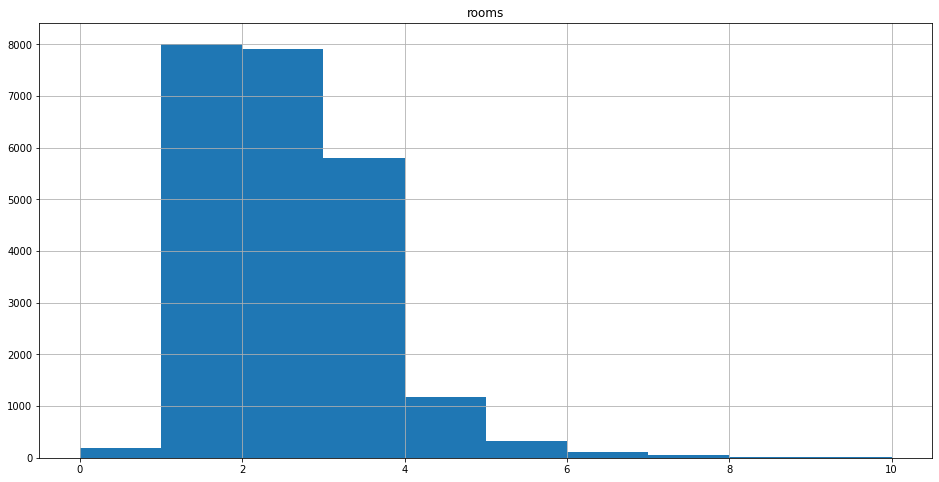

In [29]:
#количество комнат
data.hist(column='rooms', bins=10, range=(0, 10), figsize=(16, 8))
data['rooms'].describe()

In [110]:
data[data['rooms'] > 5]['rooms'].count() / data['rooms'].count() # около 0.1%.
data = data[data['rooms'] <= 5]
data['rooms'].describe()

count    20119.000000
mean         2.006859
std          0.915645
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Было принято решение избавиться от выбросов количества комнат более 5. Доля удаленных данных около 0.1%.

График имеет распределение Пуассона. Медианное и среднее значения находится на отметке 2 команты. В большинстве квартир менее 4 комнат. Количество однокомантых и двухкомантых квартир примерно равно, трехкомнатных примерно на четверть меньше.

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

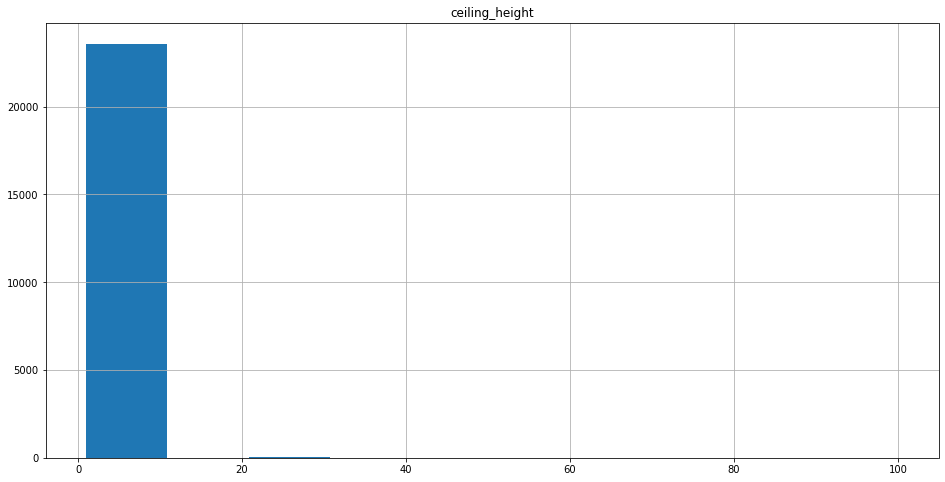

In [30]:
#высота потолков
data.hist(column='ceiling_height', bins=10, figsize=(16, 8))
data['ceiling_height'].describe()

In [31]:
#Высота потолков более 10 метро не выгляит реалитисной, также мы видим значения в диапозоне от 20 до 40 метров, скорее всего люди неверно укзали значаени. Исправим это.
def fix_height(height):
    if height >= 10: return height / 10
    else: return height
data['ceiling_height'] = data['ceiling_height'].apply(fix_height)

count    23613.000000
mean         2.697923
std          0.238047
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

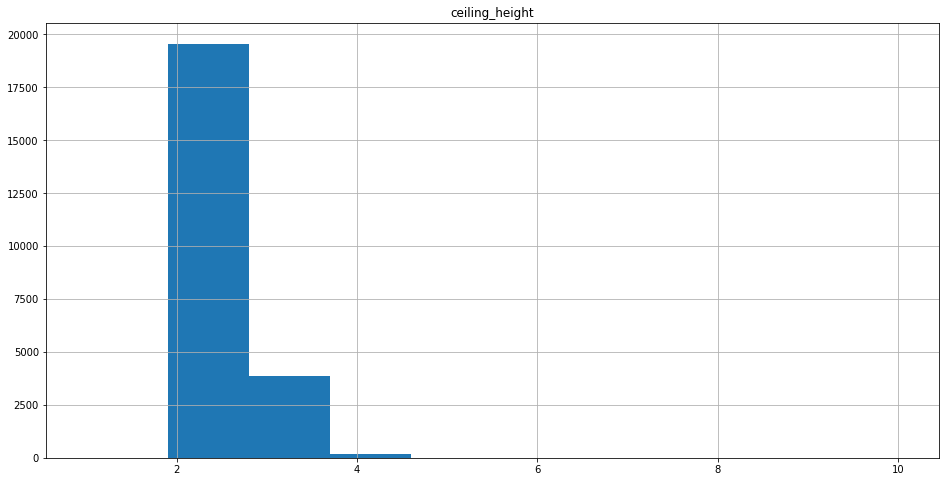

In [32]:
#высота обновленных потолков
data.hist(column='ceiling_height', bins=10, figsize=(16, 8))
data['ceiling_height'].describe()

Медианное значение находится на отметке 2.65 метра, а среднее на 2.69. В большинстве квартир потолки менее 3 метров. 

count      23613
unique         3
top       другой
freq       17363
Name: floor_type, dtype: object

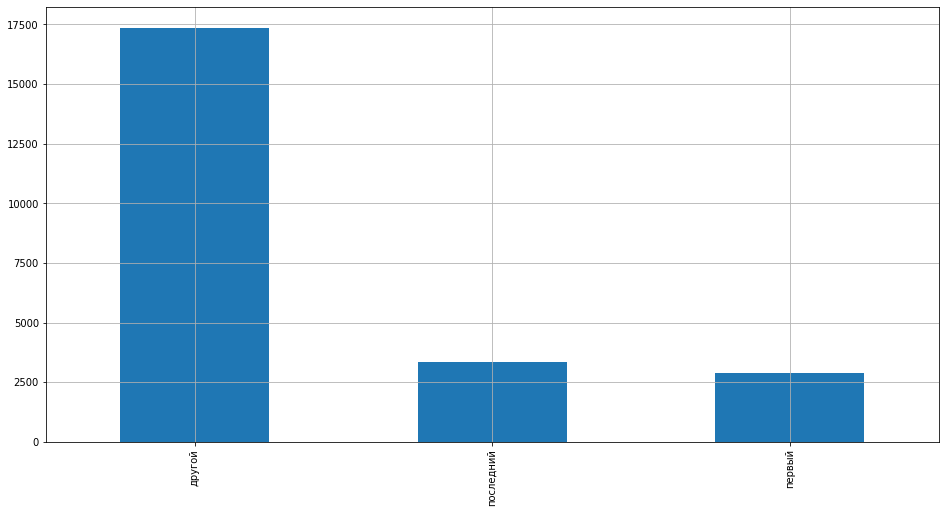

In [33]:
#тип этажа квартиры («первый», «последний», «другой»)
data['floor_type'].value_counts().plot(kind='bar', grid=True, figsize=(16, 8))
data['floor_type'].describe()

Кваритир, находящихся на первом или последнем этаже примерно одинаковое количество (2500-3000). Большая же часть объявлений приходится на квартиры, расположенные на других этажах.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

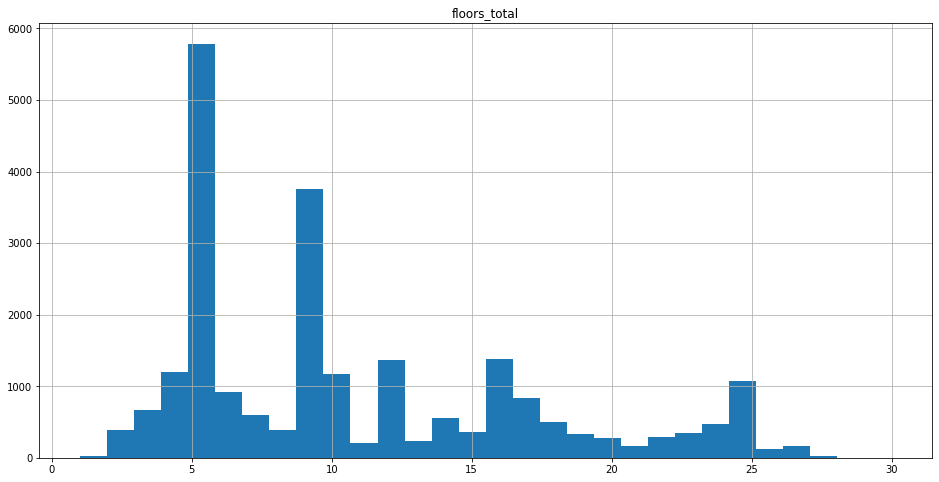

In [34]:
#общее количество этажей в доме
data.hist(column='floors_total', bins=30, range=(1, 30), figsize=(16, 8))
data['floors_total'].describe()

In [113]:
data[data['floors_total'] > 25]['floors_total'].count() / data['floors_total'].count() # около 1.5%.
data = data[data['floors_total'] <= 25]
data['floors_total'].describe()

count    19813.000000
mean        10.387170
std          6.243482
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         25.000000
Name: floors_total, dtype: float64

Было принято решение избавиться от выбросов количеством более 25 этажей. Доля удаленных данных около 1.5%.

Половина медианы находится на отметке 5 этажей, а медианное значение находится на отметке 9 этажей. При этом в этих значениях на графике имеется большое количество значений. Можно также предположить, что эти они связаны с типовой застройкой.

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

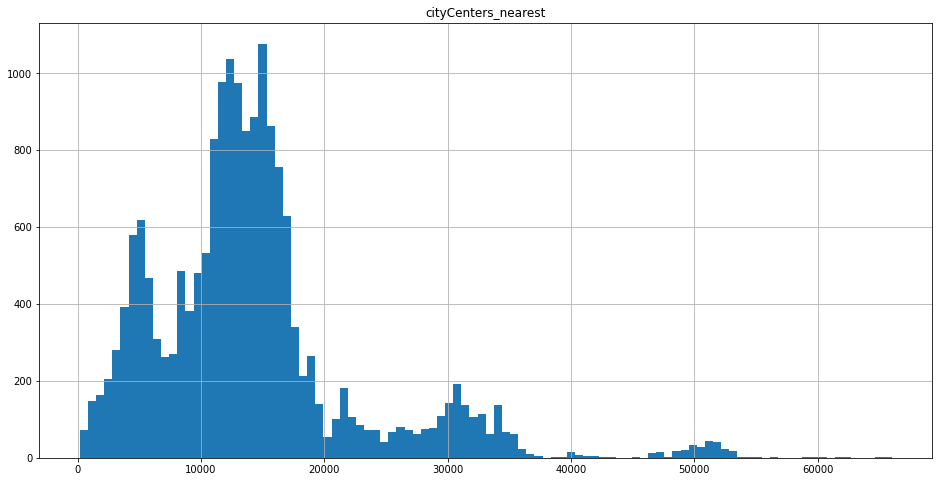

In [35]:
#расстояние до центра города в метрах
data.hist(column='cityCenters_nearest', bins=100, range=(180, 66000), figsize=(16, 8))
data['cityCenters_nearest'].describe()

In [118]:
data[data['cityCenters_nearest'] > 40000]['cityCenters_nearest'].count() / data['cityCenters_nearest'].count() # около 1.8%.
data = data[data['cityCenters_nearest'] <= 40000]
data['cityCenters_nearest'].describe()

count    14984.000000
mean     13899.082021
std       7232.796373
min        208.000000
25%       9830.500000
50%      13164.000000
75%      16096.500000
max      39936.000000
Name: cityCenters_nearest, dtype: float64

Было принято решение избавиться от выбросов расстоянием более 40000 метров. Доля удаленных данных около 1.8%.

Большинство квартир находятся не более чем в 16 км от центра города. Далее наблюдается резкий спад количества обьявлений.

count    8045.000000
mean      490.554630
std       341.336698
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

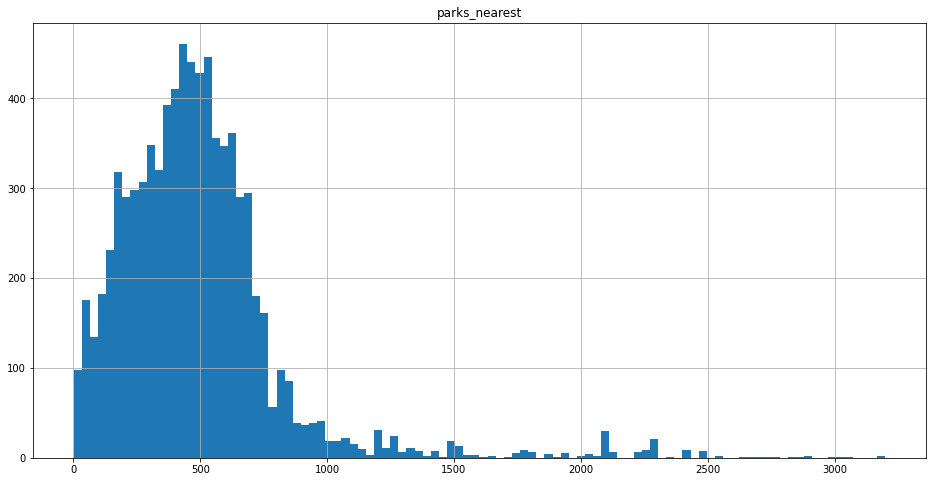

In [36]:
#расстояние до ближайшего парка
data.hist(column='parks_nearest', bins=100, range=(1, 3200), figsize=(16, 8))
data['parks_nearest'].describe()

Большинство значений расположены менее чем в 1000 метрах, скорее всего, при достижении этого порога продавцы считают, что данная информация не сильно повлияет на скорость и стоимость продажи квартиры.

**Потеря данных: около 5.7%** 

### Изучение того как быстро продавались квартиры (столбец days_exposition)»

<AxesSubplot:>

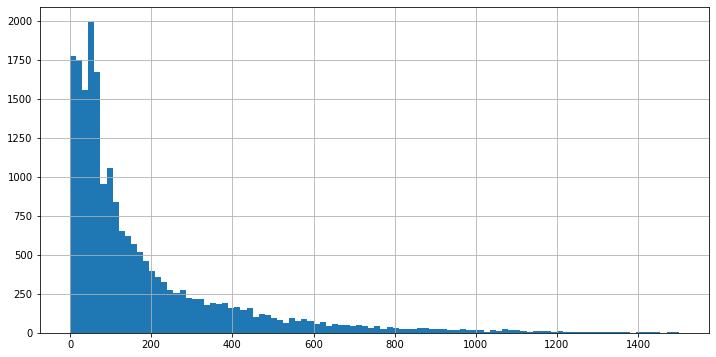

In [37]:
data['days_exposition'].hist(bins=100, range=(0, 1500), figsize=(12, 6))

In [38]:
data['days_exposition'].describe()

count    23613.000000
mean       828.249989
std       1656.061073
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       5000.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

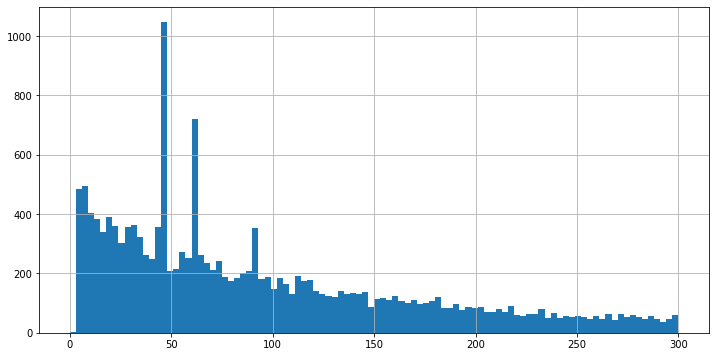

In [39]:
data['days_exposition'].hist(bins=100, range=(0, 300), figsize=(12, 6))

<AxesSubplot:>

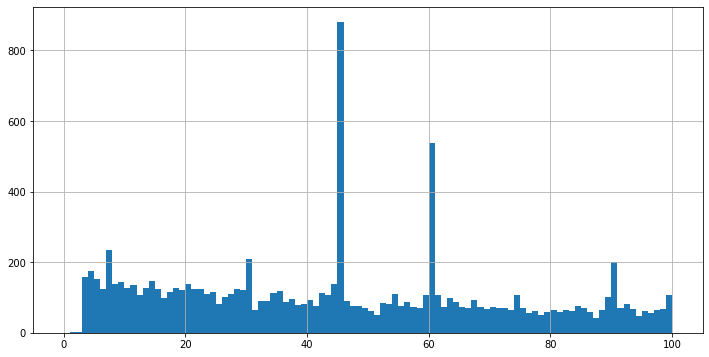

In [40]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(12, 6))

<AxesSubplot:>

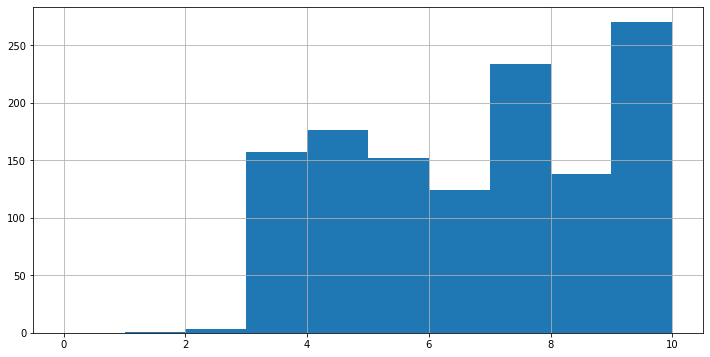

In [41]:
data['days_exposition'].hist(bins=10, range=(0, 10), figsize=(12, 6))

In [42]:
#Обнаружено аномально большое значение колиечство закрытий обьявлений в первый же день. 
#Учитывая срок оформления и передачи собственности, не будем учитывать эти данные в анализе.
filtered_data = data.query('days_exposition !=0')

In [43]:
#Также аномальными кажется количество закрытия обьявлений в 45 и 60 день. Скорее всего это дни автозакрытия обьявлений.
# Также не будем учитывать эти данные при анализе
filtered_data = filtered_data.query('days_exposition != 45 and days_exposition != 60')


<AxesSubplot:>

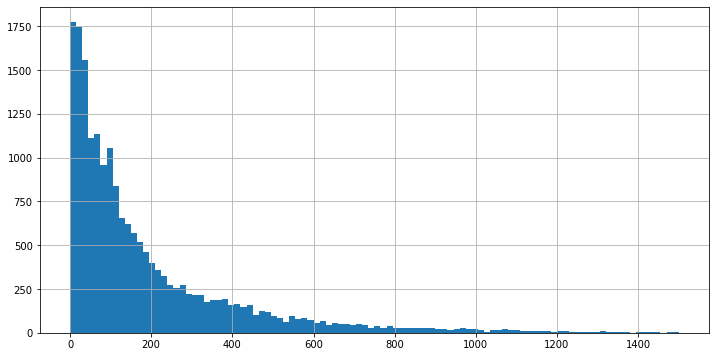

In [44]:
filtered_data['days_exposition'].hist(bins=100, range=(0, 1500), figsize=(12, 6))

<AxesSubplot:>

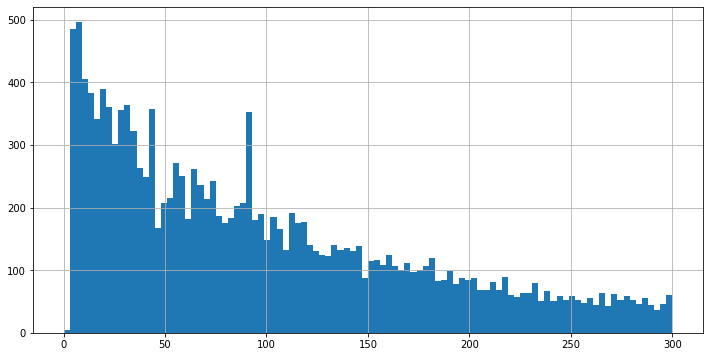

In [45]:
filtered_data['days_exposition'].hist(bins=100, range=(0, 300), figsize=(12, 6))

<AxesSubplot:>

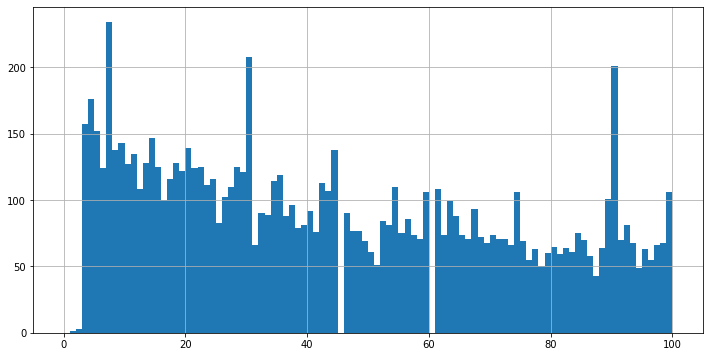

In [46]:
filtered_data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(12, 6))

In [47]:
filtered_data['days_exposition'].describe()

count    22195.000000
mean       877.926875
std       1696.072654
min          1.000000
25%         52.000000
50%        141.000000
75%        424.000000
max       5000.000000
Name: days_exposition, dtype: float64

(1.0, 800.0)

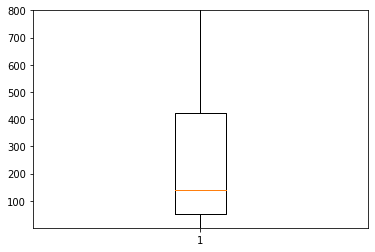

In [48]:
plt.boxplot(filtered_data['days_exposition'])
plt.ylim(1, 800)

Судя по диаграме размаха, быстрыми можно считать продажи обьявлений, которые закрылись не более чем через 500 дней, после публикации. Необычно же долгими - более 500 дней. 

### Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта». 

Изучите, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  Int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

0.30239704158417774

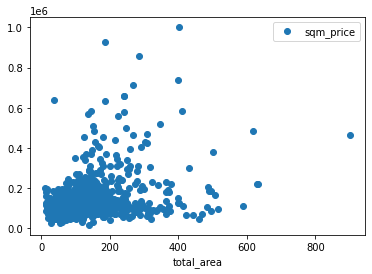

In [50]:
#Изучим зависимость цены от общей площади
sqm_price_to_total_area = data.pivot_table(index='total_area', values='sqm_price')
sqm_price_to_total_area.plot(style='o')
data['total_area'].corr(data['sqm_price'])

Можно сделать вывод о том, что есть умеренная прямая зависимость между ростом общей площади и ценой квадратного метра.

0.22664963730658008

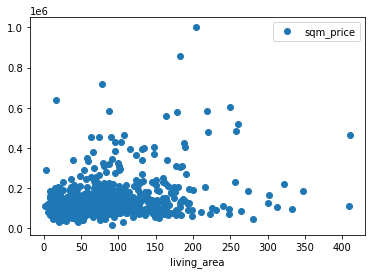

In [51]:
#Изучим зависимость цены от жилой площади
sqm_price_to_living_area = data.pivot_table(index='living_area', values='sqm_price')
sqm_price_to_living_area.plot(style='o')
data['living_area'].corr(data['sqm_price'])

Можно сделать вывод о том, что есть слабая прямая зависимость между ростом жилой площади и ценой квадратного метра. Причем, эта зависимость меньше зависмости от жилой площади.

0.3977147601381232

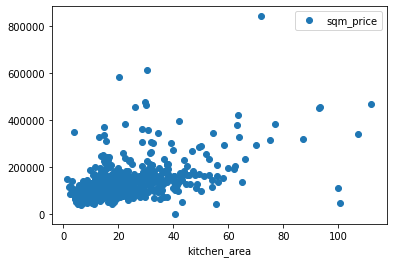

In [52]:
#Изучим зависимость цены от площади кухни
sqm_price_to_kitchen_area = data.pivot_table(index='kitchen_area', values='sqm_price')
sqm_price_to_kitchen_area.plot(style='o')
data['kitchen_area'].corr(data['sqm_price'])

Можно сделать вывод о том, что есть умеренная прямая зависимость между ростом площади кухни и ценой квадратного метра. Причем, эта зависимость больше зависмости от жилой площади.

0.05566894858321389

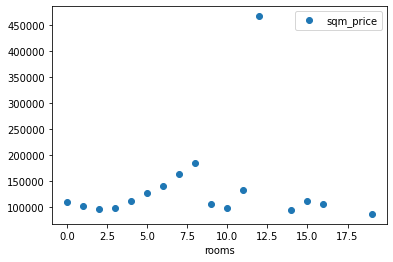

In [53]:
#Изучим зависимость цены от количества комнат
sqm_price_to_rooms = data.pivot_table(index='rooms', values='sqm_price')
sqm_price_to_rooms.plot(style='o')
data['rooms'].corr(data['sqm_price'])

Можно сделать вывод о том, что отсутсвует однозначная зависимость между ростом количества комнат и ценой квадратного метра. Однако также можно сделать вывод о том, что покупка трехкомантых квартир будет выгоднее всего.

<AxesSubplot:xlabel='floor_type'>

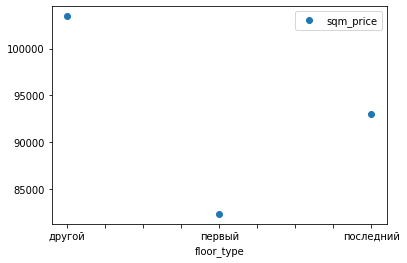

In [54]:
#Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)
sqm_price_to_floor_type = data.pivot_table(index='floor_type', values='sqm_price')
sqm_price_to_floor_type.plot(style='o')

Можно сделать вывод о том, что кваритры на первом этаже самые дешевые, кваритры на последнем этаже примерно на 10000 рублей за квадратный метр дороже, а квартиры на любом другом этаже примерно еще на столько же выше по цене.

<AxesSubplot:xlabel='day_week'>

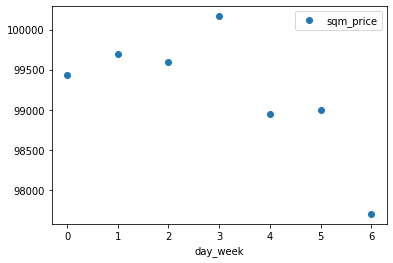

In [55]:
#Изучим зависимость цены от даты размещения (день недели)
sqm_price_to_day_week = data.pivot_table(index='day_week', values='sqm_price')
sqm_price_to_day_week.plot(style='o')

В четверг были размещены обьявления с самой большой стоимостью за метр, а в воскресенье с самой мальенкой.

<AxesSubplot:xlabel='moth_publish'>

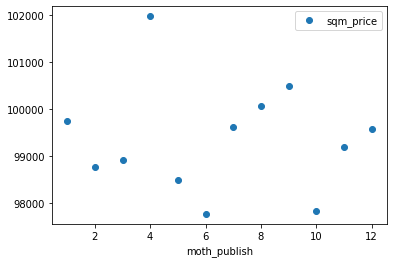

In [56]:
#Изучим зависимость цены от даты размещения (месяц)
sqm_price_to_moth_publish = data.pivot_table(index='moth_publish', values='sqm_price')
sqm_price_to_moth_publish.plot(style='o')

Нет однозначной зависимости, но можно видеть что апрель - месяц, в который были размещены обьявления с самой большой стоимостью квадратно метра, а июнь и октябрь - самой маленькой. Такжк наблюдается тренд на повышеную стоимость во второй половине года.

<AxesSubplot:xlabel='year_publish'>

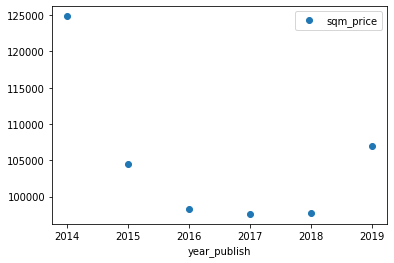

In [57]:
#Изучим зависимость цены от даты размещения (год)
sqm_price_to_year_publish = data.pivot_table(index='year_publish', values='sqm_price')
sqm_price_to_year_publish.plot(style='o')

In [58]:
corr_data = data[['sqm_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'day_week', 'moth_publish', 'year_publish']]
corr_data.corr(method='pearson')

,sqm_price,total_area,living_area,kitchen_area,rooms,day_week,moth_publish,year_publish
sqm_price,1.000000,0.302397,0.226650,0.397715,0.055669,-0.007287,-0.001915,0.008275
total_area,0.302397,1.000000,0.939770,0.609468,0.758324,-0.005680,0.004948,-0.079495
living_area,0.226650,0.939770,1.000000,0.428768,0.846006,-0.006258,-0.002333,-0.072015
kitchen_area,0.397715,0.609468,0.428768,1.000000,0.269672,-0.008634,0.002350,-0.054460
rooms,0.055669,0.758324,0.846006,0.269672,1.000000,-0.004991,-0.004004,-0.055295
day_week,-0.007287,-0.005680,-0.006258,-0.008634,-0.004991,1.000000,0.012166,-0.003927
moth_publish,-0.001915,0.004948,-0.002333,0.002350,-0.004004,0.012166,1.000000,-0.270031
year_publish,0.008275,-0.079495,-0.072015,-0.054460,-0.055295,-0.003927,-0.270031,1.000000


В 2014 году стоимость квдартного метра была на пике, а потом снизилась и была стабильной в течение нескольких лет, но потом в 2019 начал расти. Считаю, что это связано с covid 19, так как во время кризиса спрос на недвижимость, как на защитный актив, растет.

### Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [59]:
top_10_loclity = data.pivot_table(index='locality_name', values='sqm_price', aggfunc=['count', 'mean'])
top_10_loclity.columns = ['count', 'mean']
top_10_loclity = top_10_loclity.sort_values(by='count', ascending=False).head(10)
max_loclity = top_10_loclity[top_10_loclity['mean'] == top_10_loclity['mean'].max()]
min_loclity = top_10_loclity[top_10_loclity['mean'] == top_10_loclity['mean'].min()]
print(max_loclity)
print('\n')
print(min_loclity)

                 count           mean
locality_name                        
Санкт-Петербург  15651  114868.433902


               count          mean
locality_name                     
Выборг           237  58141.489451


Самая большая цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлени в Санкт-Петербург, а самая маленькая в Выборге.

### Выделение квартир в Санкт-Петербурге с помощью столбца `locality_name` и вычисление их средней стоимости на разном удалении от центра

/tmp/ipykernel_100/731564538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['km_to_city_center'] = spb['km_to_city_center'].fillna(1000.0)
/tmp/ipykernel_100/731564538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['km_to_city_center'] = spb['km_to_city_center'].astype(int)


,sqm_price
km_to_city_center,
0,187323.674419
1,166603.312500
2,146662.420195
3,129526.480916
4,137412.971207
5,146977.869792
6,152277.455319
7,141399.287469
8,120538.701649


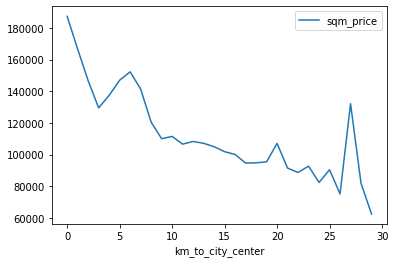

In [60]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb['km_to_city_center'] = spb['km_to_city_center'].fillna(1000.0)
spb['km_to_city_center'] = spb['km_to_city_center'].astype(int)
spb = spb.query('km_to_city_center != 1000.0')
spb = spb.pivot_table(index='km_to_city_center', values='sqm_price')
spb.plot()
spb

Судя по графику чем ближе квартира к центру, тем выше стоимость квадратного мета, однако есть выбивающиейся из данной взаимосвязи значения, но общей тренд понятен.

**Вывод:** было определено значение, на основе которого было установлено какой срок продажи обьявлений можно считать быстрым (500 дней), а какой долгим (более 500 дней). Также было выявлена прямая умеренная взаимосвязь между общей площадью, площадью кухни и стоимостью квадратного метра. При этом стоит упомянуть, что трехкомантые кваритиры и квартиры, расположенные на первом этаже, имеют самую низкую стоимость квдартного метра. Стоить отметить, что 2014 году стоимость квдартного метра была на пике, а потом снизилась и была стабильной в течение нескольких лет, но в 2019 начала расти. Считаю, что это связано с covid 19, так как во время кризиса спрос на недвижимость, как на защитный актив, растет. В ходе исследования было обнружено, что самая большая цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлени в Санкт-Петербург, а самая маленькая в Выборге. Также была изучена зависимость стоимости объектов от расстояния до центра города и сделаны следующие выводы: чем ближе квартира к центру, тем выше стоимость квадратного мета, однако есть выбивающиейся из данной взаимосвязи значения, но общей тренд понятен.




## Общий вывод

На этапе предварительного изучения датаффрейма были замечены пропуски, а также некорректный тип данных в некоторых столбцах. 
В ходе предобработки данных были исправлены типы данных в некоторых столбцах на подходящие, исправлены неявные дубликаты, а также заполнены пропуски в тех местах, в которых это можно было сделать, логически обосновав. 
На следующем этапе в датафрейм были добавлены новые столбцы, необходимые для последующего исследовательского анализа данных.
В ходе исследовательского анализа было выявлено, какой срок продажи обьявлений можно считать быстрым (500 дней), а какой долгим (более 500 дней). Также было выявлена прямая умеренная взаимосвязь между общей площадью, площадью кухни и стоимостью квадратного метра. При этом стоит упомянуть, что трехкомантые кваритиры и квартиры, расположенные на первом этаже, имеют самую низкую стоимость квдартного метра. Стоить отметить, что 2014 году стоимость квдартного метра была на пике, а потом снизилась и была стабильной в течение нескольких лет, но в 2019 начала расти. Считаю, что это связано с covid 19, так как во время кризиса спрос на недвижимость, как на защитный актив, растет. В ходе исследования было обнружено, что самая большая цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлени в Санкт-Петербург, а самая маленькая в Выборге. Также была изучена зависимость стоимости объектов от расстояния до центра города и сделаны следующие выводы: чем ближе квартира к центру, тем выше стоимость квадратного мета, однако есть выбивающиейся из данной взаимосвязи значения, но общей тренд понятен.

